In [43]:
import pandas as pd
import numpy as np
import glob
import os 
import pingouin as pg
import matplotlib.pyplot as plt
import scipy.stats as stats

In [66]:
def read_files(path_dir):
    res_df      = pd.DataFrame(None, columns=['ResponseTime', 'Request Rate', 'page size', 'Request Rate * page size'])     
    for elem in glob.glob(path_dir + "*.csv"):
        print('---AVVIO LETTURA: ', elem)
        tempDF = pd.read_csv(elem)
        tempDF = tempDF[tempDF.responseMessage == 'OK']
        ResponseTime = tempDF['elapsed'].mean()
        
        path_tail = os.path.split(elem)
        name = path_tail[1].split('_')[1].split('.')[0]
        label = path_tail[1].split('_')[0]
        
        if 'CatturaL' in label:
            label = 'L'
        if 'CatturaMH' in label:
            label = 'MH'
        if 'CatturaML' in label:
            label = 'ML'
        if 'CatturaS' in label:
            label = 'S'
        
        if name == '9k':
            name = 9000
        else:
            name = 3000
        res_df.loc[len(res_df.index)] = [ResponseTime, name, label, ]

    return res_df

def qq_plot(series_name, df):
        plt.title(series_name)
        ax = pg.qqplot(df[series_name], dist='norm', confidence=.95)
        test = stats.shapiro(df[series_name])
        print(test)
        plt.show()

def variance(series_name, df):
    plt.title(series_name)
    plt.scatter(df[series_name], df['ResponseTime'])
    plt.xlabel(series_name)
    plt.ylabel('ResponseTime')

In [67]:
path_dir = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE/'
df= read_files(path_dir)

---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL01_3k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL02_3k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL03_3k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL04_3k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL05_3k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL06_9k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL07_9k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL08_9k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impianti/impianti_pratica/DOE/OsservazioniDOE\CatturaL09_9k.csv
---AVVIO LETTURA:  C:/Users/stefa/Desktop/Impi

In [68]:
df

,ResponseTime,Request Rate,label,mean,Residuo
0,14593.052632,3000,L,18126.820698,-3533.768067
1,9137.421053,3000,L,18126.820698,-8989.399646
2,23471.500000,3000,L,18126.820698,5344.679302
3,22532.437500,3000,L,18126.820698,4405.616802
4,20899.692308,3000,L,18126.820698,2772.871609
5,22249.875000,9000,L,16679.286915,5570.588085
6,17994.052632,9000,L,16679.286915,1314.765716
7,20257.562500,9000,L,16679.286915,3578.275585
8,10020.944444,9000,L,16679.286915,-6658.342471
9,12874.000000,9000,L,16679.286915,-3805.286915


ShapiroResult(statistic=0.684859037399292, pvalue=5.5432224144169595e-08)


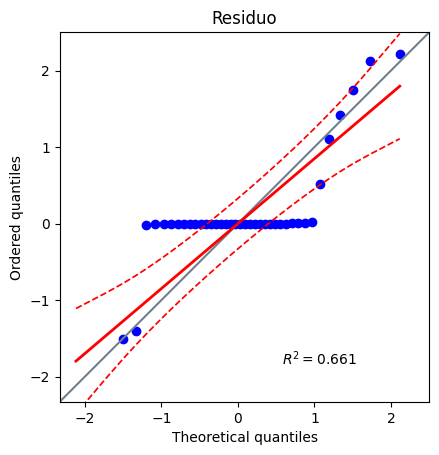

In [74]:
qq_plot('Residuo', df)

In [73]:
#df.to_csv('DOE.csv', sep=',')